# About this Notebook
 This is our final submission of the bonus project of 'Advanced Machine Learning'. This notebook contains all three modules (preprocessing, eda and predictions). For a better overview we recommend our [github repository](https://github.com/negralessio/advanced-ml-final-project).

---
# Task 1: Explain dataset and business problems in two paragraphs.

**Data Understanding**:
The data is from the US FinTech company `LendingClub` ([Website](https://www.lendingclub.com)) that is located in San Fransisco and was founded in 2006. The company offers a peer-to-peer lending platform that is the world's largest one. It contains 2,260,701 total observations (data of borrowers / applicants) and 151 features such as the loan amount that the applicant requested, the interest rate he got and many more, but most importantly the loan status. A full list of the features can be seen [here](https://docs.google.com/spreadsheets/d/13mEvWhh5ju3gNFKn3wpB6gZ1erNHyCFNQFedGZrKcFo/edit#gid=1169809635). Since the data is not cleaned yet, we have to do several steps of preprocessing before we start with the EDA and with the default predictions.

**Business Understand**:
For the FinTech company it is crucial to detect whether a borrower is able to fully repay the loan or if she/he defaults. It can be very costly to approve a loan to someone that then defaults. Therefore, we can use Machine Learning and Explanatory Data Analysis (EDA) to recognize patterns that help us detect defaults and thus minimizes the risk of defaulting.

---
# Preprocessing
Preprocess and clean the data for further usage

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style='whitegrid')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

## Load Data
Data can be downloaded from [Kaggle](https://www.kaggle.com/datasets/wordsforthewise/lending-club?datasetId=902). Information about the columns can be seen here on [Google Drive](https://drive.google.com/file/d/1UzyKMtrzL3aEEQpeYIz_qjBWyW-lAMr0/view).

In [2]:
# Read data
accepted_df = pd.read_csv(filepath_or_buffer="../data/raw/accepted_2007_to_2018Q4.csv")

C:\Users\Aless\AppData\Local\Temp\ipykernel_3268\3513952175.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted_df = pd.read_csv(filepath_or_buffer="../data/raw/accepted_2007_to_2018Q4.csv")


In [3]:
# Get number of rows apriori of preprocessing
N = accepted_df.shape[0]

# Print information about raw datasets
print(f"Shape of accepted_df: {accepted_df.shape}")

Shape of accepted_df: (2260701, 151)


In [4]:
accepted_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## NaNs Features Removal

In [5]:
# Compute fraction of NaNs in each Attribute
null_count_series = accepted_df.isna().sum().div(N)
# Sort descending
null_count_series = null_count_series.sort_values(ascending=False)

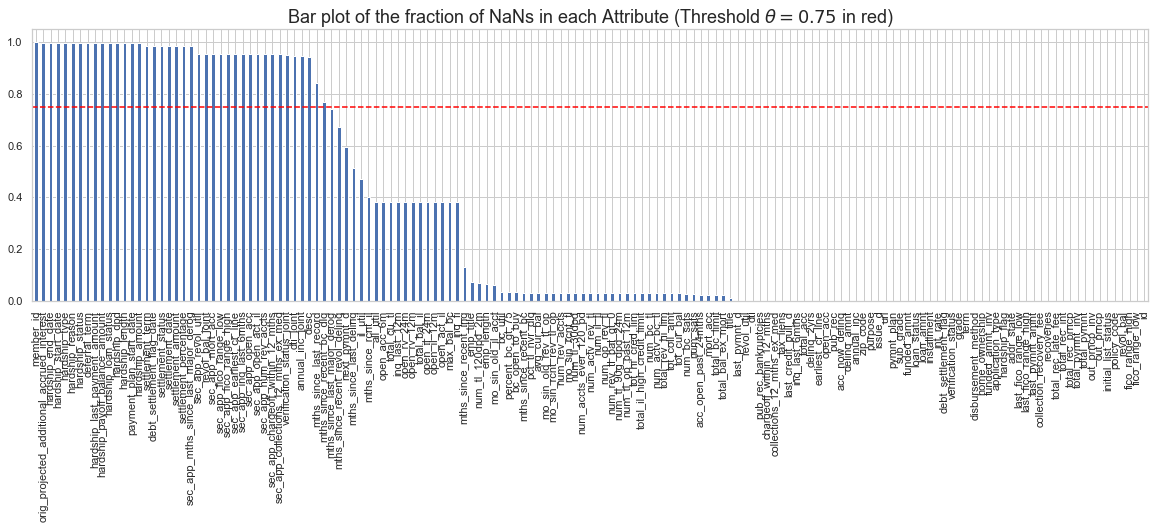

In [6]:
# Define threshold theta: Each column with more or equal NaNs than the threshold will be removed.
threshold = 0.75

plt.figure(figsize=(20,5))
plt.title(f"Bar plot of the fraction of NaNs in each Attribute (Threshold $\\theta = {threshold}$ in red)", size=18)
null_count_series.plot.bar()
# Add threshold as red line
plt.axhline(y=threshold, color="red", linestyle = "--")
plt.show()

In [7]:
# Remove all rows where the NaN Fraction is >= threshold.
null_count_series_cut = null_count_series[null_count_series.values < threshold]

In [8]:
# Get column names of the features with NaN fraction < threshold
columns_post_nan_cut = list(null_count_series_cut.index)
# Keep all columns in accepted_df that are in columns_post_nan_cut
accepted_df = accepted_df.drop([col for col in accepted_df.columns if col not in columns_post_nan_cut], axis=1)

In [9]:
accepted_df.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


## Feature Cleaning

In [10]:
# Feature Cleaning
def clean_employment_length(value:str):
    """
    Function to clean and encode the attribute "emp_length"
    :param value: Content of the cell
    :return: Cleaned encoding, i.e. 0 for <1 year, and 10 for more than 10 years employment.
    """
    if value == "< 1 year":
        return 0.0
    if value == "10+ years":
        return 10.0
    if value == "nan":
        return np.nan
    else:
        # For the rest, i.e. values of the form "x years" -- keep only the numeric value
        return float(re.sub('[^0-9]','', str(value)))

# Remove "years" in "emp_length" and encode values according to the function defined above
accepted_df['emp_length'] = accepted_df['emp_length'].apply(lambda x: clean_employment_length(str(x)))

# Remove suffix in attribute "term"
accepted_df["term"] = accepted_df["term"].apply(lambda x: re.sub('[^0-9]','', str(x)))

## Categorical / Nominal Features
In this section we remove attributes / features that are nominal scaled and contain too many realizations. We do this since it is not feasible to encode attributes with this much realization. Also, the information gain keeping those attributes in would be insignificant.

In [11]:
print(accepted_df.dtypes.value_counts())
cat_columns_df = accepted_df.select_dtypes(include=['object']).astype('category')
# since loan status is the basis for implementing the target variable later on we exclude it from these transformations
cat_columns_df.drop('loan_status', inplace=True, axis='columns')
cat_columns = cat_columns_df.columns.tolist()

float64    87
object     24
dtype: int64


### Drop categorical features with too many realizations
We do this since it's not feasible to encode categorical features with too many realization, i.e. a variable with $K$ realizations produces $K-1$ dummy variables.

In [12]:
# Create DataFrame
cat_stats_df = pd.DataFrame()
# Append categorical columns to the df
cat_stats_df["column"] = cat_columns
# Append the number of unique objects in each categorical column to the df
cat_stats_df["n_unique_objects"] = [len(accepted_df[col].unique()) for col in cat_columns]
cat_stats_df["N"] = [len(accepted_df[col]) for col in cat_columns]
# Append the fraction of unique objects in each categorical column to the df
cat_stats_df["n_unique_objects_in_percent"] = cat_stats_df["n_unique_objects"] / cat_stats_df["N"]
# Sort descending
cat_stats_df.sort_values(by="n_unique_objects_in_percent", ascending=False)

,column,n_unique_objects,N,n_unique_objects_in_percent
0,id,2260701,2260701,1.000000
9,url,2260669,2260701,0.999986
4,emp_title,512695,2260701,0.226786
11,title,63156,2260701,0.027936
12,zip_code,957,2260701,0.000423
14,earliest_cr_line,755,2260701,0.000334
18,last_credit_pull_d,142,2260701,0.000063
7,issue_d,140,2260701,0.000062
16,last_pymnt_d,137,2260701,0.000061
17,next_pymnt_d,107,2260701,0.000047


**Result**:
We can see that there exist nominal attributes that have too much realization, such as 'id', 'url', 'emp_title', 'title', 'zip_code', and 'earlierst_cr_line'. Therefore, we drop all nominal columns that have more or equal than $\alpha=55$ of unique values.

In [13]:
# Set threshold
alpha = 55

# Get columns names to drop and drop them on the master df
nominal_columns_to_drop = cat_stats_df.query(f'n_unique_objects >= {alpha}').column
accepted_df.drop(nominal_columns_to_drop, axis=1, inplace=True)
print(f'Dropped nominal attributes are\n{nominal_columns_to_drop}')

Dropped nominal attributes are
0                     id
4              emp_title
7                issue_d
9                    url
11                 title
12              zip_code
14      earliest_cr_line
16          last_pymnt_d
17          next_pymnt_d
18    last_credit_pull_d
Name: column, dtype: object


## Create Target
In this section we build our binary target variable based on the attribute 'loan_status'. The target is either 1, if the owner of the loan defaulted, and 0 otherwise.

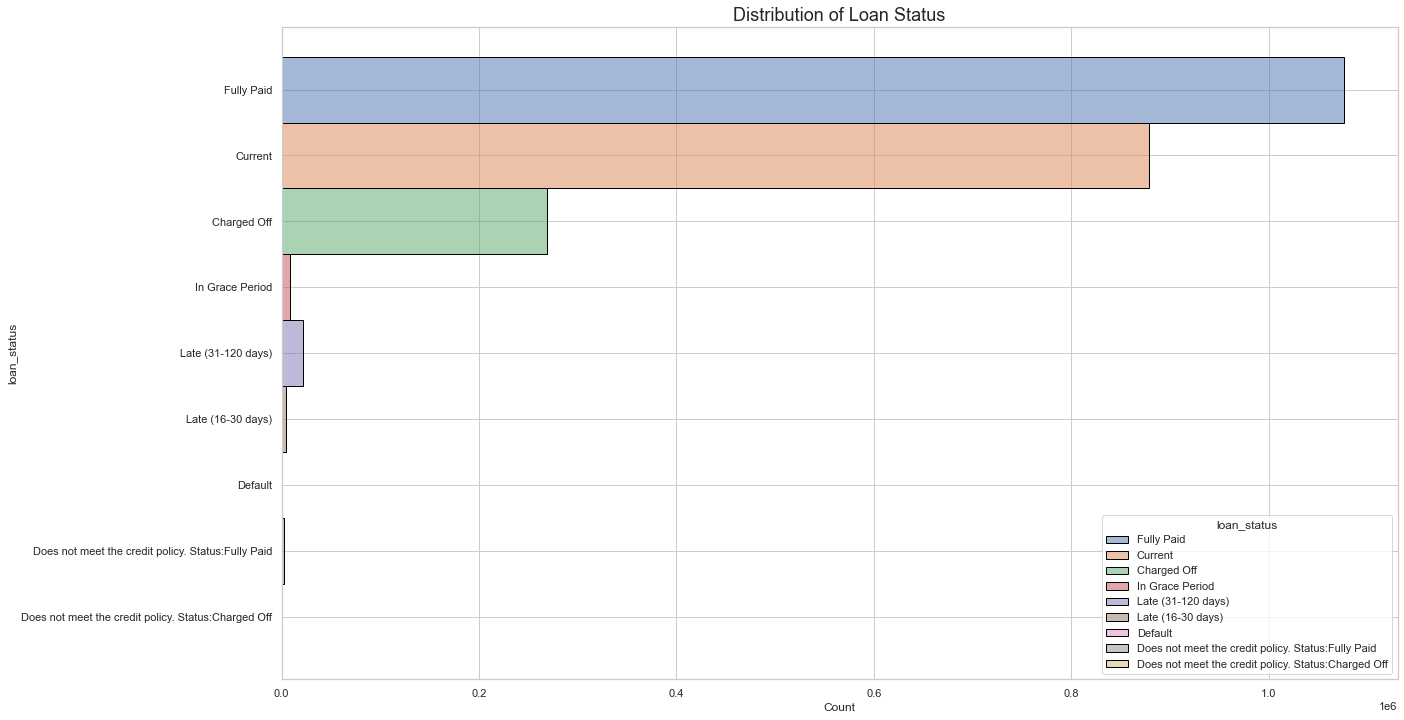

In [14]:
# Preview of the distribution of loan_status realizations
plt.figure(figsize=(20,12))
plt.title("Distribution of Loan Status", size=18)
ax = sns.histplot(data=accepted_df, y="loan_status", edgecolor="black", hue="loan_status")
sns.move_legend(ax, loc="lower right")
plt.show()

We are only interested in objects that either have 'Fully Paid' or 'Charged Off' as their loan status. Therefore, we filter for these realizations.
Afterwards, we encode
- 'Fully Paid' as a 0 (default) and
- 'Charged Off' as a 1 (non default).

We use this encoding for our binary classifier and predictor.

In [15]:
# Keep only objects with 'Fully Paid' or 'Charged Off' realization in loan_status.
accepted_df = accepted_df.query('(loan_status == "Fully Paid") | (loan_status == "Charged Off")')
# Preview binary distribution
accepted_df.loan_status.value_counts()
accepted_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,10.0,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,10.0,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,10.0,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,3.0,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,4.0,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [16]:
# Replace 'Fully Paid' with 0, and 'Charged Off' with 1
accepted_df['loan_status'] = accepted_df['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1})

# Set column 'loan_status' as integer
accepted_df['loan_status'] = accepted_df['loan_status'].astype(int)

In [17]:
# Preview final distribution of the loan status (target variable)
accepted_df.loan_status.value_counts()

0    1076751
1     268559
Name: loan_status, dtype: int64

In [18]:
# Saving
#accepted_df.to_pickle('../data/preprocessed/accepted_df_preprocessed.pkl')

---
# Task 2: Do an explanatory analysis for this dataset
We are performing an explanatory data analysis (EDA) on the preprocessed dataframe located in 'data/preprocessed' in order to get a better understanding of our data.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme(style='whitegrid')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

## Read Data

In [20]:
#df = pd.read_pickle('../data/preprocessed/accepted_df_preprocessed.pkl')
df = accepted_df.copy()
print(f"Shape of df: {df.shape}")
df.head(5)

Shape of df: (1345310, 101)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,10.0,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,10.0,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,10.0,MORTGAGE,...,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,3.0,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,4.0,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


## EDA
In the following sections we explore our data set, i.e. we do EDA.

0    1076751
1     268559
Name: loan_status, dtype: int64


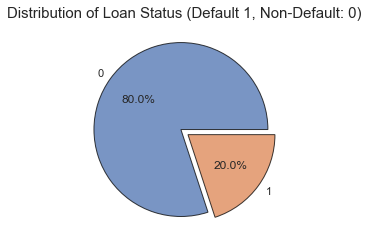

In [21]:
# Get Number of Non-Default (0) and Default (1)
loan_status_value_count = df['loan_status'].value_counts()
print(loan_status_value_count)

# Print absolut number
n_non_default = loan_status_value_count[0]
n_default = loan_status_value_count[1]

# Pie Plot Settings
plt.title("Distribution of Loan Status (Default 1, Non-Default: 0)", size = 15)
plt.pie(x=loan_status_value_count, autopct='%1.1f%%', wedgeprops={"edgecolor":"black", "alpha": 0.75},
        labels=loan_status_value_count.keys(), explode = [0.05, 0.05])
plt.show()

---
### Loan Distribution
In order to get a better understanding how the loan amount is distributed, we plot a histogram grouped by the loan status.

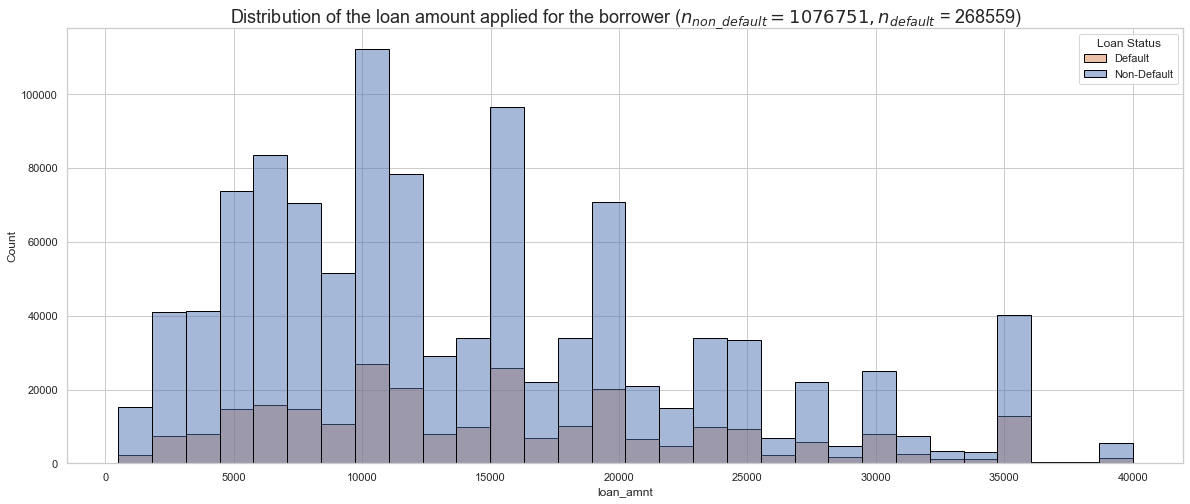

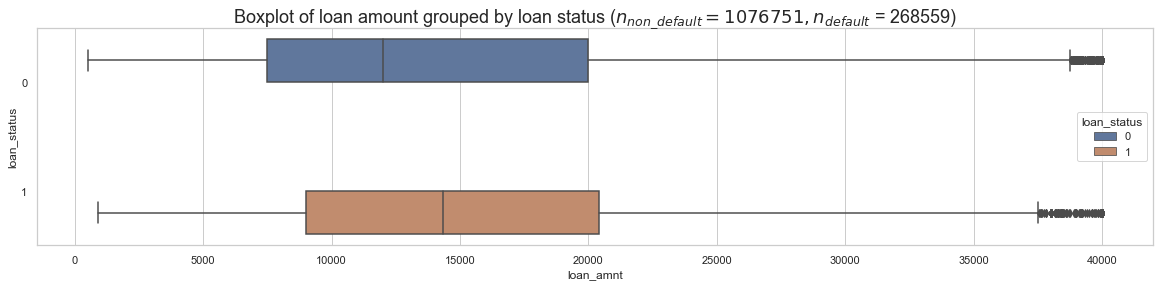

loan_amnt                                                \
                  count      mean      std     min      25%       50%   
loan_status                                                             
0            1076751.00  14134.37  8669.03  500.00  7500.00  12000.00   
1             268559.00  15565.06  8814.56  900.00  9000.00  14350.00   

                                 
                  75%       max  
loan_status                      
0            20000.00  40000.00  
1            20400.00  40000.00

In [22]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the loan amount applied for the borrower "
          f"($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='loan_amnt', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 4))
plt.title(f"Boxplot of loan amount grouped by loan "
          f"status ($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='loan_amnt', y='loan_status', orient='h', hue='loan_status', saturation=0.6)
#plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Get descriptive statistics from loan_amnt grouped by status
df[['loan_amnt','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)

---
### Loan Status & LC Grade

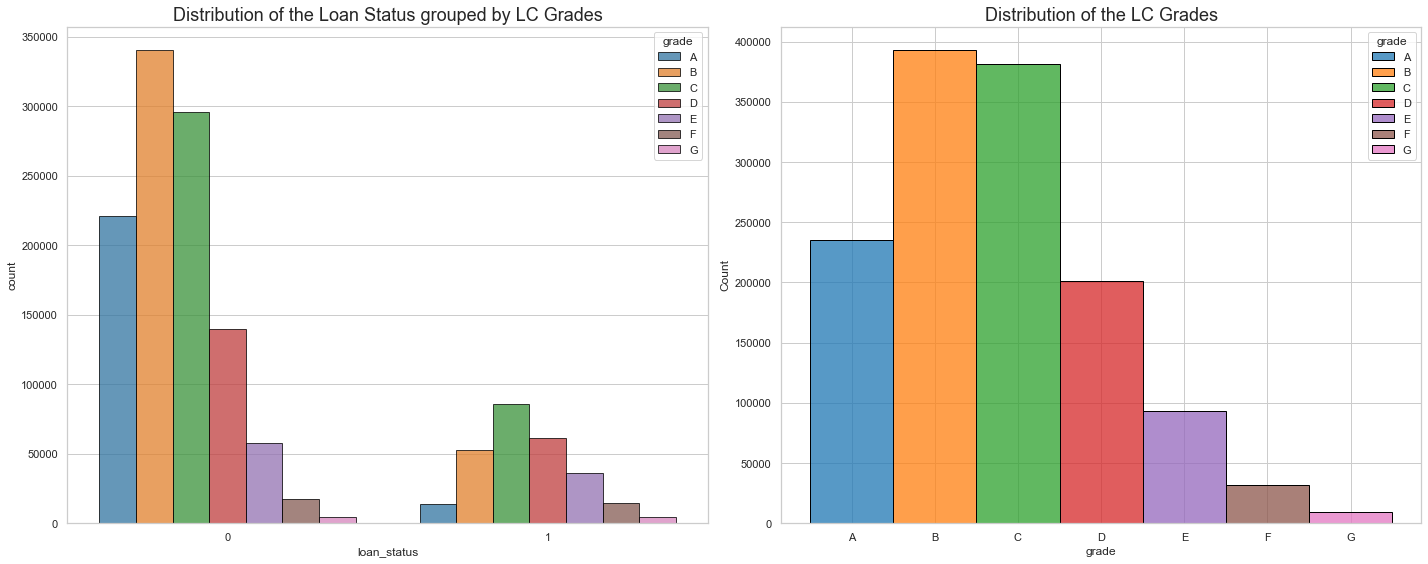

In [23]:
# Set column as category, TODO: Do this step in the preprocessing notebook
df["grade"] = df["grade"].astype("category")

# Plot settings
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
sns.countplot(data=df, x="loan_status", hue="grade", edgecolor="black", palette="tab10", ax=axs[0], alpha=0.75)
sns.histplot(data=df, x="grade", edgecolor="black", palette="tab10", hue="grade", ax=axs[1], alpha=0.75)
axs[0].set_title("Distribution of the Loan Status grouped by LC Grades", size=18)
axs[1].set_title("Distribution of the LC Grades", size=18)
fig.tight_layout()
plt.show()

---
### Annual Income and Address State
Plot shows the average annual income of our borrowers grouped by the state they live in.

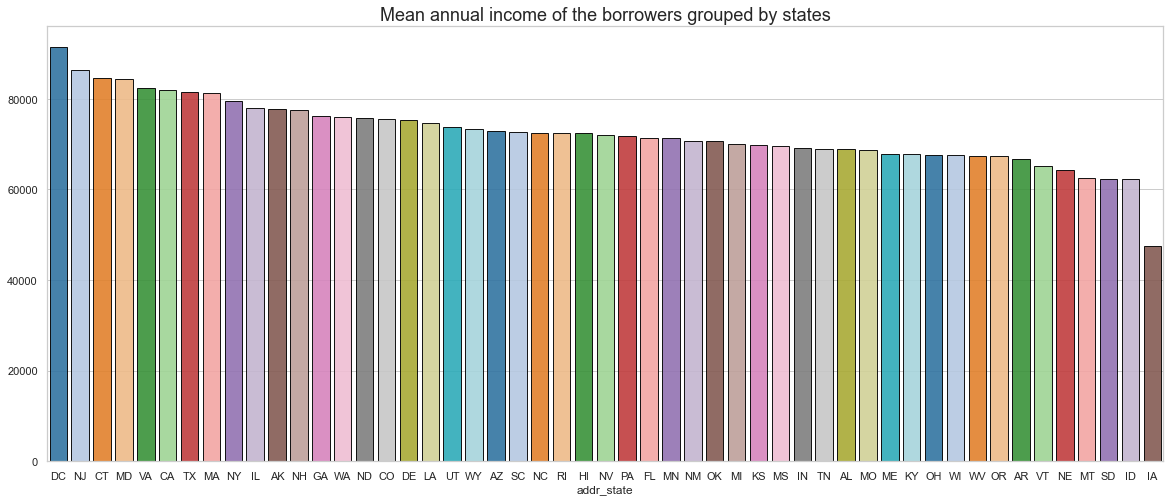

In [24]:
# Get mean of annual income grouped by addr_state
mean_annual_income_addr_state_df = df.groupby('addr_state')['annual_inc'].mean().sort_values(ascending=False)
# Attention: Address State 'IA' has only 7 observations, while the rest has at least 2000.

# Plot settings
plt.figure(figsize=(20,8))
plt.title("Mean annual income of the borrowers grouped by states", size=18)
sns.barplot(x = mean_annual_income_addr_state_df.keys(),
            y = mean_annual_income_addr_state_df.values,
            palette="tab20",
            alpha=0.9,
            edgecolor="black")
plt.show()

---
### Interest Rate Analysis
We can clearly see that defaulted lenders have a significantly higher interest rate than non-defaulted lenders.

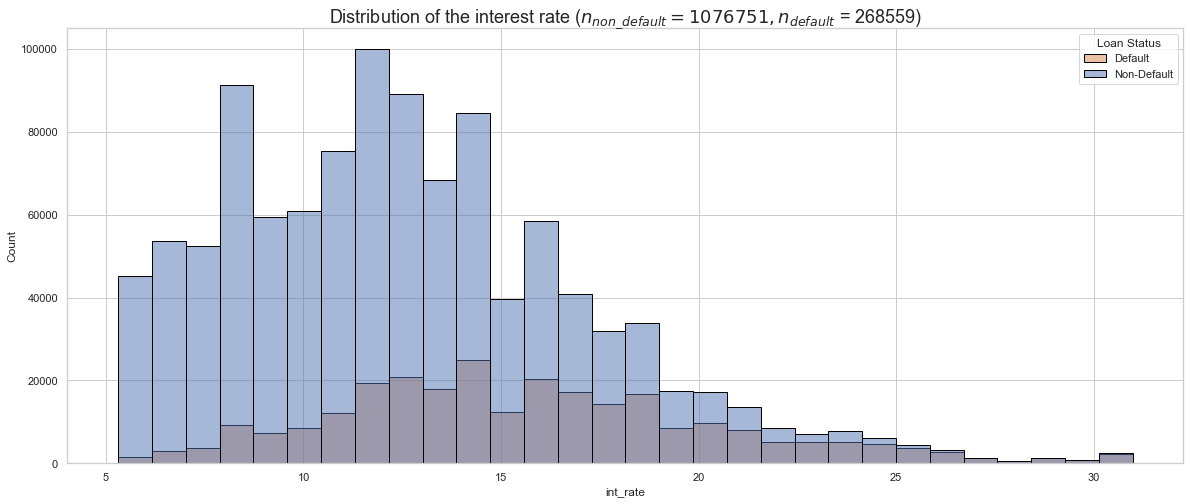

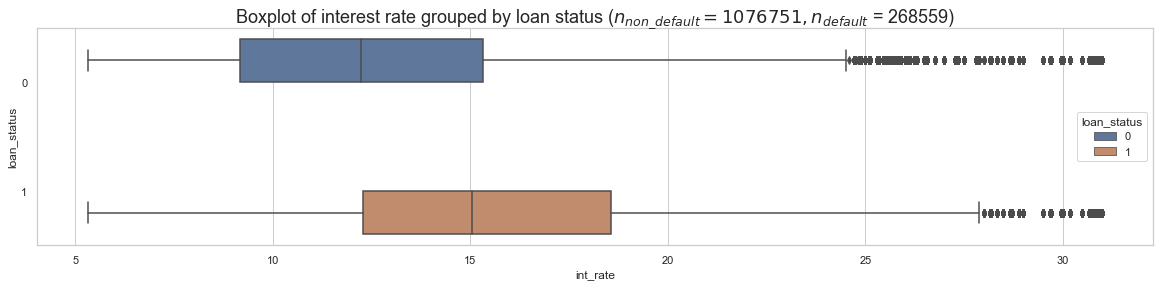

int_rate                                               
                  count   mean   std   min    25%    50%    75%    max
loan_status                                                           
0            1076751.00  12.62  4.53  5.31   9.17  12.23  15.31  30.99
1             268559.00  15.71  4.91  5.31  12.29  15.05  18.55  30.99

In [25]:
# Plot Loan amount distribution
plt.figure(figsize=(20, 8))
plt.title(f"Distribution of the interest rate "
          f"($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.histplot(data=df, x='int_rate', bins=30, edgecolor='black', hue='loan_status', multiple='layer')
plt.legend(title='Loan Status', labels=['Default', 'Non-Default'])
plt.show()

# Plot boxplot
plt.figure(figsize=(20, 4))
plt.title(f"Boxplot of interest rate grouped by loan "
          f"status ($n_{{non\_default}} = {n_non_default}, n_{{default}}$ = {n_default})", size=18)
sns.boxplot(data=df, x='int_rate', y='loan_status', orient='h', hue='loan_status', saturation=0.6)
plt.show()

# Get descriptive statistics from int rate grouped by status
df[['int_rate','loan_status']].groupby('loan_status').describe().applymap('{:.2f}'.format)

---
# Model Preprocessing: Encode Features from categorical to numerical
In this section we prepare our data set for modeling through fixing the inbalancement of our data, encoding categorical data, dropping features that are only apriori the application known etc...

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.utils import resample
# For modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Lasso, lasso_path, lars_path
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from tqdm.notebook import tqdm
from matplotlib.colors import ListedColormap
#sns.set_palette('viridis')
pd.options.mode.chained_assignment = None  # Supress warning, default='warn'

## Take subsample of data for computational issues
Since our PC is not capable to do Cross Validation of multiple models of 1.3 Millions of Data, we take a subsample size and perform it on that.

In [27]:
# TAKE SUBSAMPLE OF DATA FOR COMPUTATION ISSUES
df = df.sample(frac = 0.5)
print(df.shape)

(672655, 101)


## Drop columns for prediction
In this small section we drop features that we do not have prior the lending application. We consulted the data dictionary table (seen [here](https://docs.google.com/spreadsheets/d/13YQDRQYYbr84wy7zQ91yfC8QoEBFPFP0zR5pIDf18rA/edit#gid=629438262)) and analyzed which columns to keep and which to drop. Note that this requires a lot of domain knowledge.

In [28]:
keep_list = ['addr_state', 'annual_inc', 'annual_inc_joint', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'last_fico_range_high', 'last_fico_range_low', 'loan_amnt', 'loan_status', 'mort_acc', 'num_bc_tl', 'num_bc_sats', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'total_bc_limit', 'total_il_high_credit_limit', 'verification_status', 'zip_code']

cols_to_drop = [col for col in df.columns if col not in keep_list]
print(f"Cols to drop: {cols_to_drop}")
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"Shape of df after drop: {df.shape}")

Cols to drop: ['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 

In [29]:
# Convert term to float32
df["term"] = df["term"].astype(np.float64)

# Preview categorical data
print(df.dtypes.value_counts())
# Get categorical columns names
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
# Preview
print(f"Current categorical features:\n{cat_columns}")

float64     22
object       7
category     1
int32        1
dtype: int64
Current categorical features:
['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type']


### Deleted irrelevant categorical features
Delete categorical features that are not relevant for the Modelling or contain too many realization so that encoding them would be infeasible.

In [30]:
# Define categorical columns from cat_columns to keep here
CAT_COLS_TO_KEEP = ["home_ownership", "grade", "sub_grade", "verification_status", "application_type", "initial_list_status"]
CAT_COLS_TO_DROP = [col for col in cat_columns if col not in CAT_COLS_TO_KEEP]

print(f"Categorical Columns to drop: {CAT_COLS_TO_DROP}")
print(f"Categorical Columns to keep: {CAT_COLS_TO_KEEP}\n")
print(f"Shape of df before columns drop: {df.shape}")
# Drop irrelevant categorical features
df.drop(CAT_COLS_TO_DROP, axis=1, inplace=True)
print(f"Shape of df after columns drop: {df.shape}")

Categorical Columns to drop: ['purpose', 'addr_state']
Categorical Columns to keep: ['home_ownership', 'grade', 'sub_grade', 'verification_status', 'application_type', 'initial_list_status']

Shape of df before columns drop: (672655, 31)
Shape of df after columns drop: (672655, 29)


## Preview of the remaining categorical features

In [31]:
print(df.dtypes.value_counts())
df.select_dtypes("object")

float64     22
object       5
category     1
int32        1
dtype: int64


,sub_grade,home_ownership,verification_status,initial_list_status,application_type
452919,A5,MORTGAGE,Not Verified,f,Individual
2234701,C2,MORTGAGE,Verified,w,Individual
1904766,B2,MORTGAGE,Verified,f,Individual
363872,B4,RENT,Not Verified,f,Individual
113091,A1,MORTGAGE,Not Verified,w,Individual
...,...,...,...,...,...
247635,A5,RENT,Source Verified,w,Individual
942451,B3,RENT,Verified,w,Individual
2157524,B3,MORTGAGE,Source Verified,w,Individual
2025967,A2,OWN,Source Verified,w,Individual


In [32]:
# Preview of all remaining columns / features:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'dti', 'fico_range_low', 'fico_range_high', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'mort_acc', 'num_bc_sats', 'num_bc_tl',
       'pub_rec_bankruptcies', 'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object')


## Create Dummy Variables

In [33]:
# Binary Encoding
import category_encoders as ce
print(f"Shape before dummies using BinaryEncoder: {df.shape}")
# Encode categorical columns
encoder = ce.BinaryEncoder(cols=CAT_COLS_TO_KEEP)
df_binary = encoder.fit_transform(df)
print(f"Shape after dummies using BinaryEncoder: {df_binary.shape}")
# check
df_binary.dtypes.value_counts()

Shape before dummies using BinaryEncoder: (672655, 29)
Shape after dummies using BinaryEncoder: (672655, 41)


float64    22
int64      18
int32       1
dtype: int64

In [34]:
# Convert all values to float
df_binary = df_binary.astype(np.float32)
df_binary.dtypes.value_counts()

float32    41
dtype: int64

## Preview preprocessed dataframe

In [35]:
df_binary.head(10)

,loan_amnt,term,int_rate,installment,grade_0,grade_1,grade_2,sub_grade_0,sub_grade_1,sub_grade_2,...,last_fico_range_high,last_fico_range_low,application_type_0,application_type_1,mort_acc,num_bc_sats,num_bc_tl,pub_rec_bankruptcies,total_bc_limit,total_il_high_credit_limit
452919,3000.0,36.0,7.96,93.959999,0.0,0.0,1.0,0.0,0.0,0.0,...,669.0,665.0,0.0,1.0,3.0,4.0,9.0,0.0,12700.0,128260.0
2234701,30000.0,60.0,13.49,690.150024,0.0,1.0,0.0,0.0,0.0,0.0,...,739.0,735.0,0.0,1.0,2.0,1.0,3.0,0.0,2500.0,0.0
1904766,15000.0,36.0,11.14,492.079987,0.0,1.0,1.0,0.0,0.0,0.0,...,624.0,620.0,0.0,1.0,1.0,4.0,10.0,0.0,10300.0,59343.0
363872,17275.0,36.0,10.99,565.479980,0.0,1.0,1.0,0.0,0.0,0.0,...,794.0,790.0,0.0,1.0,0.0,5.0,6.0,0.0,23900.0,12815.0
113091,15000.0,36.0,5.32,451.730011,0.0,0.0,1.0,0.0,0.0,0.0,...,719.0,715.0,0.0,1.0,2.0,14.0,15.0,0.0,31200.0,0.0
714356,20000.0,36.0,9.75,643.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,654.0,650.0,0.0,1.0,0.0,5.0,7.0,0.0,21300.0,16388.0
1069489,12000.0,36.0,8.39,378.200012,0.0,1.0,1.0,0.0,0.0,0.0,...,774.0,770.0,0.0,1.0,3.0,6.0,10.0,0.0,30700.0,22800.0
1285513,28000.0,36.0,8.90,889.090027,0.0,0.0,1.0,0.0,0.0,0.0,...,699.0,695.0,0.0,1.0,7.0,7.0,13.0,0.0,36100.0,77880.0
1267343,15600.0,36.0,14.99,540.710022,0.0,1.0,0.0,0.0,0.0,1.0,...,704.0,700.0,0.0,1.0,0.0,3.0,4.0,1.0,8200.0,25661.0
1943114,16000.0,60.0,21.49,437.279999,1.0,0.0,0.0,0.0,0.0,1.0,...,759.0,755.0,0.0,1.0,0.0,7.0,8.0,0.0,20700.0,38712.0


## Create Balanced Data Set via Downsampling

0.0    538404
1.0    134251
Name: loan_status, dtype: int64
(672655, 41)


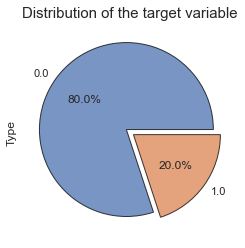

In [36]:
print(df_binary.loan_status.value_counts())
print(df_binary.shape)

plt.title("Distribution of the target variable", size=15)
df_binary.groupby('loan_status').size().plot(kind='pie', y = "loan_status",
                                             label = "Type", autopct='%1.1f%%',
                                             wedgeprops = {"edgecolor": "black", "alpha": 0.75},
                                             explode = [0.05, 0.05])
plt.show()

0.0    174526
1.0    134251
Name: loan_status, dtype: int64


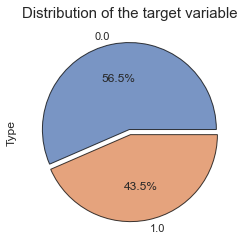

In [37]:
# Downsampling
loan_status_0 = df_binary[df_binary["loan_status"] == 0.0]
loan_status_1  = df_binary[df_binary["loan_status"] == 1.0]

loan_status_0_downsample = resample(loan_status_0,
             replace=True,
             n_samples=round(1.3*len(loan_status_1)),
             random_state=42)

df_binary_downsampled = pd.concat([loan_status_0_downsample, loan_status_1])

print(df_binary_downsampled["loan_status"].value_counts())
# Plot settings
plt.title("Distribution of the target variable", size=15)
df_binary_downsampled.groupby('loan_status').size().plot(kind='pie', y = "loan_status",
                                             label = "Type", autopct='%1.1f%%',
                                             wedgeprops = {"edgecolor": "black", "alpha": 0.75},
                                             explode = [0.03, 0.03])
plt.show()

## Data Imputation
Since we still have some NaNs in our feature, we replace them by taking the median values.

In [38]:
# Fill NaNs with Median
df_binary_downsampled = df_binary_downsampled.fillna(df_binary_downsampled.median())
# Preview
df_binary_downsampled.head(5)

,loan_amnt,term,int_rate,installment,grade_0,grade_1,grade_2,sub_grade_0,sub_grade_1,sub_grade_2,...,last_fico_range_high,last_fico_range_low,application_type_0,application_type_1,mort_acc,num_bc_sats,num_bc_tl,pub_rec_bankruptcies,total_bc_limit,total_il_high_credit_limit
691953,5000.0,36.0,10.75,163.110001,0.0,1.0,1.0,0.0,0.0,0.0,...,674.0,670.0,0.0,1.0,0.0,5.0,5.0,0.0,13400.0,5760.0
1029730,20000.0,36.0,5.32,602.299988,0.0,0.0,1.0,0.0,0.0,0.0,...,834.0,830.0,0.0,1.0,3.0,6.0,9.0,0.0,47800.0,0.0
1344459,10000.0,36.0,13.53,339.500000,0.0,1.0,1.0,0.0,1.0,0.0,...,709.0,705.0,0.0,1.0,5.0,2.0,10.0,0.0,2800.0,30222.0
1640281,17000.0,36.0,16.82,604.580017,1.0,0.0,1.0,0.0,1.0,0.0,...,694.0,690.0,0.0,1.0,1.0,4.0,7.0,0.0,14500.0,31669.0
1172888,12000.0,36.0,6.03,365.230011,0.0,0.0,1.0,0.0,0.0,0.0,...,674.0,670.0,0.0,1.0,2.0,6.0,14.0,0.0,8100.0,48925.0


## Data Split
In this section we split the data into a training and test set. The corresponding model is then trained on the training set and tested on the test set.

In [39]:
# Fraction of test data
TEST_SIZE = 0.2

X = df_binary_downsampled.drop("loan_status", axis=1)
y = df_binary_downsampled["loan_status"]

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=1997, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (247021, 40)
Shape of X_test: (61756, 40)
Shape of y_train: (247021,)
Shape of y_test: (61756,)


## Scaling
We scale the data with the MinMaxScaler to a range of $[0, 1]$

In [40]:
# Init object
scaler = MinMaxScaler()
# Scale X_train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)
# Scale X_test
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled)

# Preview X_train_scaled
X_train_scaled.head(10)

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.488491,1.0,0.312305,0.258512,0.0,1.0,0.0,0.0,0.0,1.0,...,0.634118,0.633136,0.0,1.0,0.09375,0.087719,0.200000,0.111111,0.024073,0.013676
1,0.040921,0.0,0.188863,0.035772,0.0,1.0,1.0,0.0,0.0,0.0,...,0.869412,0.869823,0.0,1.0,0.00000,0.052632,0.184615,0.000000,0.045471,0.000000
2,0.248082,0.0,0.242212,0.194361,0.0,1.0,1.0,0.0,1.0,0.0,...,0.904706,0.905325,0.0,1.0,0.00000,0.087719,0.092308,0.000000,0.029601,0.002500
3,0.207161,0.0,0.299065,0.166936,0.0,1.0,1.0,0.0,1.0,0.0,...,0.628235,0.627219,0.0,1.0,0.00000,0.070175,0.076923,0.000000,0.014087,0.011335
4,0.130435,0.0,0.760903,0.128522,1.0,0.0,1.0,0.0,1.0,1.0,...,0.810588,0.810651,0.0,1.0,0.00000,0.052632,0.061538,0.000000,0.015692,0.007400
5,0.360614,0.0,0.389408,0.296154,0.0,1.0,0.0,0.0,0.0,1.0,...,0.898823,0.899408,0.0,1.0,0.00000,0.105263,0.092308,0.111111,0.039051,0.020350
6,0.488491,0.0,0.061526,0.351770,0.0,0.0,1.0,0.0,1.0,0.0,...,0.892941,0.893491,0.0,1.0,0.12500,0.087719,0.076923,0.000000,0.042083,0.013476
7,0.181586,0.0,0.213006,0.142084,0.0,1.0,1.0,0.0,0.0,0.0,...,0.692941,0.692308,0.0,1.0,0.06250,0.140351,0.123077,0.000000,0.004815,0.006822
8,0.099744,0.0,0.271807,0.082515,0.0,1.0,0.0,0.0,0.0,1.0,...,0.810588,0.810651,0.0,1.0,0.00000,0.035088,0.046154,0.000000,0.013552,0.000000
9,0.457161,0.0,0.357087,0.369195,0.0,1.0,0.0,0.0,0.0,1.0,...,0.828235,0.828402,0.0,1.0,0.18750,0.087719,0.076923,0.000000,0.053673,0.012451


---
# Task 3: Logistic Regression In Sample
Use logistic regression (in-sample) for default prediction. Interpret your results for logistic regression

In [41]:
# Fit Model via GridSearch + Cross Validation
param_grid = {"tol": [0.01, 0.001, 0.0001],
              'fit_intercept': [True, False],
              'max_iter': [1000],
              'C': [1, 2, 3]}
# Apply GridSearch with above defined grid
grid_cv = GridSearchCV(estimator = LogisticRegression(),
                       param_grid=param_grid,
                       n_jobs=-1,
                       cv=5)
# Fit Grid CV with Training set
grid_cv.fit(X_train_scaled, y_train)
# Output best params
print(f"Best params: {grid_cv.best_params_} with a score of {grid_cv.best_score_:.4f}")

Best params: {'C': 3, 'fit_intercept': True, 'max_iter': 1000, 'tol': 0.01} with a score of 0.8884


In [42]:
cv_results = pd.DataFrame(grid_cv.cv_results_)
cv_results = cv_results.sort_values(by="rank_test_score", ascending=True)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_max_iter,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,15.851633,1.365235,0.017354,0.001954,3,True,1000,0.0001,"{'C': 3, 'fit_intercept': True, 'max_iter': 10...",0.889829,0.88845,0.887195,0.889381,0.887054,0.888382,0.001120,1
13,15.798774,1.425042,0.017354,0.000798,3,True,1000,0.001,"{'C': 3, 'fit_intercept': True, 'max_iter': 10...",0.889829,0.88845,0.887195,0.889381,0.887054,0.888382,0.001120,1
12,15.802365,1.386477,0.016556,0.001017,3,True,1000,0.01,"{'C': 3, 'fit_intercept': True, 'max_iter': 10...",0.889829,0.88845,0.887195,0.889381,0.887054,0.888382,0.001120,1
17,9.233122,0.696861,0.019548,0.003373,3,False,1000,0.0001,"{'C': 3, 'fit_intercept': False, 'max_iter': 1...",0.889849,0.88843,0.887155,0.889179,0.886993,0.888321,0.001114,4
15,9.295356,0.722601,0.016954,0.000892,3,False,1000,0.01,"{'C': 3, 'fit_intercept': False, 'max_iter': 1...",0.889849,0.88843,0.887155,0.889179,0.886993,0.888321,0.001114,4


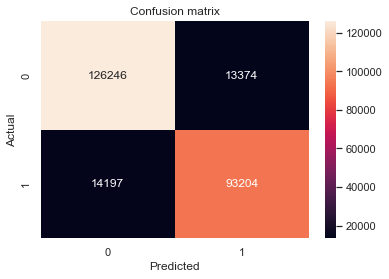

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90    139620
         1.0       0.87      0.87      0.87    107401

    accuracy                           0.89    247021
   macro avg       0.89      0.89      0.89    247021
weighted avg       0.89      0.89      0.89    247021



In [43]:
# Perform Logistic Regression on the best estimator selected by above Cross Validation
y_pred = grid_cv.predict(X_train_scaled)

# Plot Confusion matrix for in sample (y_train instead of y_test)
cm = confusion_matrix(y_true=y_train, y_pred=y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot classification report
print(classification_report(y_true=y_train, y_pred=y_pred))

## Interpretation
We achieve an accuracy of around 90% for our in-sample prediction. This seems good but not perfect considering that we test the model on seen data (i.e. Trainings data). However, through the beginning feature selection (keeping only features that we have at the beginning of a loan application) this is still a very good indicator whether we should accept or decline a loan application.

---
# Task 4: Compare different classification models
Comparing
* logistic regression,
* classification tree,
* random forest,
* bagging,
* support vector machine (with two kernel functions),
* and neural network

for default prediction based on the out-of-sample performance measures (at least three different measures).

In [44]:
%%time
models = []

models.append(("LogisticRegression",LogisticRegression(fit_intercept=True, max_iter=1000, solver="saga")))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("BaggingCLF",BaggingClassifier()))
models.append(("SVC_rbf",SVC(kernel='rbf', max_iter=500)))
models.append(("SVC_poly",SVC(kernel="poly", max_iter=500)))
models.append(("NeuronalNetwork", MLPClassifier(alpha=1, max_iter=1000)))

results = []
names = []
# Define scoring metrices for CV
scoring = ["accuracy", "precision", "recall", "f1"]
for name, model in tqdm(models):
    result = cross_validate(model, X_train_scaled, y_train,  cv=3, n_jobs=-1, scoring=scoring)
    names.append(name)
    results.append(result)

  0%|          | 0/7 [00:00<?, ?it/s]

CPU times: total: 656 ms
Wall time: 3min 55s


In [45]:
# Get name of metrices (will be column in result_df)
metrices = list(results[0].keys())
# Create empty dataframe
results_df = pd.DataFrame(index=names, columns=metrices, dtype="float32")

# File dataframe by iterating over all results and taking the mean value
for i, name in enumerate(models):
    mean_of_metrices = []
    for key in results[i].keys():
        mean_of_metrices.append(results[i].get(key).mean())
    results_df.iloc[i] = mean_of_metrices

# Drop scoring_time column as it is not of interest
results_df.drop("score_time", axis=1, inplace=True)
# Round to 5 decimal places
results_df = results_df.round(decimals=5)
# Sort descending of f1 score
results_df = results_df.sort_values(by="test_f1", ascending=False)
# Preview
results_df

,fit_time,test_accuracy,test_precision,test_recall,test_f1
RandomForest,42.317902,0.90132,0.87696,0.89919,0.88793
LogisticRegression,13.936750,0.88819,0.87475,0.86697,0.87084
BaggingCLF,29.300020,0.88878,0.87988,0.86185,0.87077
NeuronalNetwork,90.853523,0.88428,0.87633,0.85470,0.86522
DecisionTree,4.135920,0.84066,0.82363,0.80614,0.81479
SVC_poly,10.865960,0.47173,0.45135,0.98969,0.61984
SVC_rbf,12.409480,0.57505,0.51421,0.36732,0.42792


## Results
We can see that a RandomForest Model performs the best according to the f1 score, which is the harmonic mean between recall and precision. Also LogisticRegression, as a very good interpretable model, performs pretty well and is ranked 2nd. SVC, on the other hands, perform very poorly.

---
# Task 5: Use LASSO for feature selection and explain results

In [46]:
features = X_train.columns

Do Hyperparameter Tuning for LASSO. Especially in order to find the perfect lambda serving as a control variable for the relative impact of the regularization for LASSO and also decides what features are selected.

In [47]:
%%time
# Use StandardScaler for LASSO
X_train_standardized = StandardScaler().fit_transform(X_train)

# define parameters
param_grid = param = {
    'alpha':[0.0001, 0.001, 0.01],
    'fit_intercept':[True,False],
    'positive':[True,False],
    'selection':['cyclic','random'],
    }

# define search
search = GridSearchCV(Lasso(max_iter=10000),
                      param_grid,
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )
# execute search
search.fit(X_train_standardized,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 2min 39s
Wall time: 42.9 s


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'fit_intercept': [True, False],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [48]:
# summarize result
print(f"Best Score: {search.best_score_}")
print(f"Best Hyperparameters: {search.best_params_}")
best_alpha = search.best_params_.get("alpha")

Best Score: -0.09989293515682221
Best Hyperparameters: {'alpha': 0.0001, 'fit_intercept': True, 'positive': False, 'selection': 'random'}


Having found the best estimator we now can take a look which features we keep and which we discard.

In [49]:
# values of the coefficients
coefficients = search.best_estimator_.coef_
# importance of a feature = absolute value of its coefficient
importance = np.abs(coefficients)
assert(len(features) == len(importance))
# selected features
selected_features = np.array(features)[importance > 0]
# discarded features
discarded_features = np.array(features)[importance == 0]

**Feature Selection**

Trough selecting alpha = 0.0001, the feature importance is reduced, where the feature importance itself is the absolute value of its coefficient. Therefore, a discarded features importance is denoted by zero value given in the below table and on the other hand those we will keep are denoted by higher value as zero.



In [50]:
print(f"Importances: \n {importance} \n" + "-" * 60)
print(f"Selected Features: {selected_features} \n" + "-" * 60)
print(f"Discarded Features: {discarded_features} \n" + "-" * 60)

Importances: 
 [9.62063018e-03 4.42487001e-02 1.51143421e-03 3.63169350e-02
 3.98122426e-03 4.98409430e-03 1.28239195e-03 2.35627987e-03
 5.30566927e-03 2.20307033e-03 2.62776925e-03 3.18413775e-04
 1.51519803e-03 2.19477317e-03 8.61708308e-04 7.02755991e-03
 8.77886836e-04 9.91722662e-03 3.79737641e-04 3.44106229e-03
 1.19079286e-02 6.47322554e-03 3.06523144e-02 4.11768956e-03
 1.84734224e-03 2.72199255e-03 7.65375094e-03 1.24377273e-02
 1.30598771e-03 9.85640581e-05 4.07648504e-01 3.76918912e-02
 8.29356315e-04 3.20722419e-03 5.03582135e-03 1.01436945e-02
 3.44349770e-03 2.38476228e-03 1.13449851e-02 8.62494111e-03] 
------------------------------------------------------------
Selected Features: ['loan_amnt' 'term' 'int_rate' 'installment' 'grade_0' 'grade_1' 'grade_2'
 'sub_grade_0' 'sub_grade_1' 'sub_grade_2' 'sub_grade_3' 'sub_grade_4'
 'sub_grade_5' 'emp_length' 'home_ownership_0' 'home_ownership_1'
 'home_ownership_2' 'annual_inc' 'verification_status_0'
 'verification_status_1'

## Lasso Paths

In [51]:
alphas_lasso, coeffs_lasso, _ = lasso_path(X_train_standardized, y_train, n_alphas=X_train_standardized.shape[1])

In [52]:
# Create DataFrame with coefficients and alpha from lasso
lasso_paths_df = pd.DataFrame(coeffs_lasso, index=X.columns)
# Let the index be the features and the columns be the alphas for plotting reasons
lasso_paths_df.columns = -np.log10(alphas_lasso)
# use log transformation for better visualization

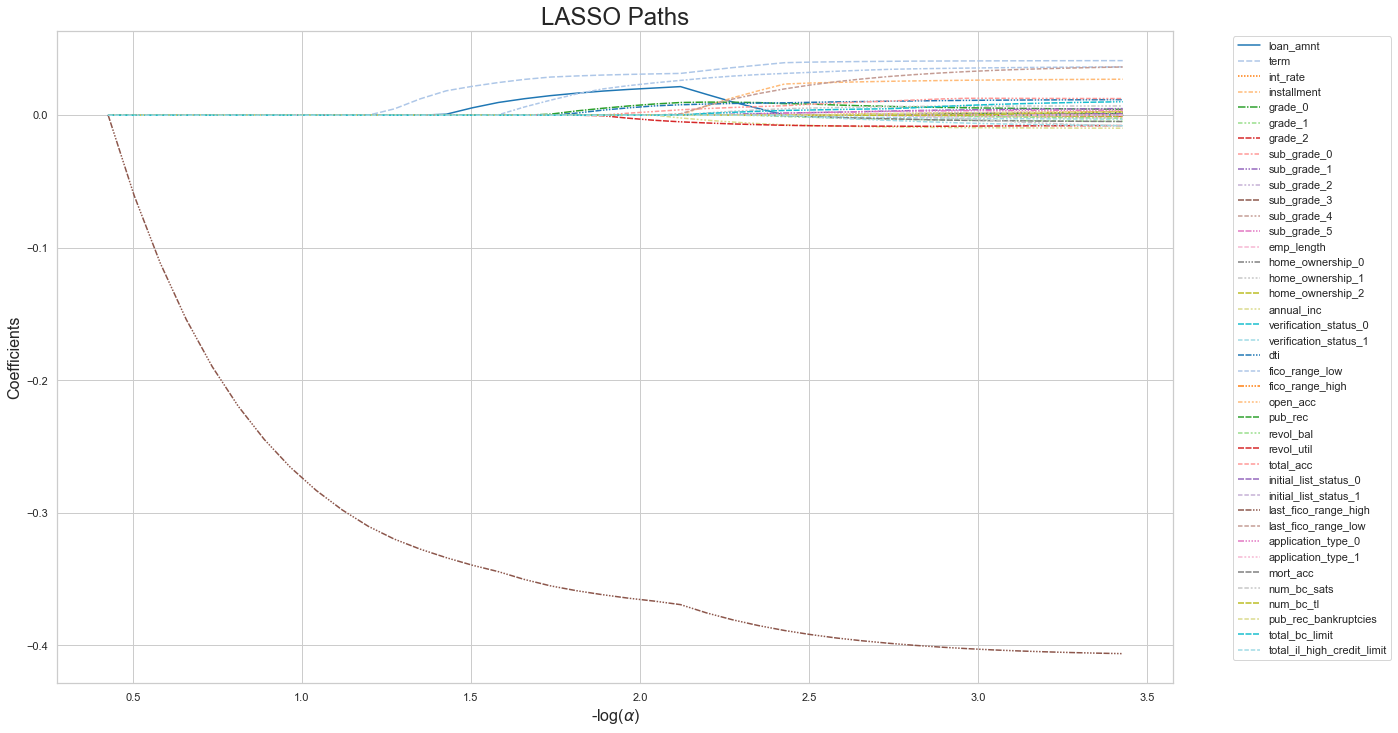

In [53]:
plt.figure(figsize=(20, 12))
plt.title("LASSO Paths", size=24)
sns.lineplot(data=lasso_paths_df.T, palette="tab20")
plt.legend(bbox_to_anchor=(1.2, 1))
plt.xlabel("-log($\\alpha$)", size=16)
plt.ylabel("Coefficients", size=16)
plt.show()

---
# Task 6: Which model do you suggest to the peer-to-peer company? Why?
We rate each model based on the following four criterias learned on the lecture:
- Interpretability
- Robustness
- Speed
- Scalability

In [54]:
results_df.head(10)

,fit_time,test_accuracy,test_precision,test_recall,test_f1
RandomForest,42.317902,0.90132,0.87696,0.89919,0.88793
LogisticRegression,13.936750,0.88819,0.87475,0.86697,0.87084
BaggingCLF,29.300020,0.88878,0.87988,0.86185,0.87077
NeuronalNetwork,90.853523,0.88428,0.87633,0.85470,0.86522
DecisionTree,4.135920,0.84066,0.82363,0.80614,0.81479
SVC_poly,10.865960,0.47173,0.45135,0.98969,0.61984
SVC_rbf,12.409480,0.57505,0.51421,0.36732,0.42792


## Results
Above we can see the final result table sorted decreasingly by the f1 score. We can see that RandomForest is slightly better than LogisticRegression. However, RandomForest lack the interpretability that LogisticRegression has. Also LogisticRegression is still considered a very fast model that is also robust and scales well. If we are more considered about the accuarcy, a Neuronal Network would also be a good choice. Note that we did not do any hyperparameter tuning for NN due to time reason and we did not build a custom network using popular frameworks such as tensorflow. We are sure, that a NN would have a better accuracy. However, it comes with the lack of interpretability, i.e. Neuronal Networks are black boxes in terms of interpretability.

**To summarize: We would recommend the **LogisticRegression** for the Peer 2 Peer LendingClub as a fast, good interpretable, good scalable and robust model.**